이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
mnist.load_data?

In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_images.shape #차원을 볼 수 있음

(60000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images[1].shape

(28, 28)

In [ ]:
len(train_labels)

60000

In [7]:
train_labels.shape

(60000,)

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# 

In [13]:
layers.Dense(512, activation="relu")

**컴파일 단계**

In [15]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기**

In [16]:
train_images = train_images.reshape((60000, 28 * 28))  #(6만,784)
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**모델 훈련**

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)   
# X : train_images , Y :train_labels  
# epochs : 전체 데이터를 5번 돌려라 , batch_size : 6만개 중에서 128개 만 써서 업데이트 반복

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0048 - accuracy: 0.9991
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 0.9998


**모델을 사용해 예측 만들기**

In [21]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 140ms/step


array([2.1485546e-11, 3.4781199e-12, 2.0176587e-09, 1.3017571e-07,
       9.2088767e-17, 4.3358286e-12, 9.6191014e-17, 9.9999988e-01,
       7.9081360e-11, 1.3726216e-08], dtype=float32)

In [22]:
predictions

array([[2.14855460e-11, 3.47811992e-12, 2.01765871e-09, 1.30175707e-07,
        9.20887669e-17, 4.33582857e-12, 9.61910136e-17, 9.99999881e-01,
        7.90813595e-11, 1.37262157e-08],
       [1.37467576e-12, 6.99869496e-09, 1.00000000e+00, 4.41401110e-10,
        7.75857206e-21, 7.39834301e-13, 1.00191123e-11, 1.66031835e-19,
        1.12395193e-09, 1.60800240e-19],
       [2.96193847e-10, 9.99867678e-01, 4.27302120e-06, 9.03031161e-09,
        3.90517386e-07, 4.79411639e-08, 6.92827413e-08, 8.17299861e-06,
        1.19278695e-04, 1.21052457e-09],
       [9.99999881e-01, 4.43507400e-14, 6.60138255e-08, 4.53742892e-13,
        2.44481030e-13, 2.71778802e-12, 3.69619571e-08, 1.06742188e-08,
        1.96057397e-14, 9.57399826e-10],
       [2.97125463e-10, 2.75456903e-13, 6.58129995e-10, 6.93722423e-14,
        9.99965787e-01, 1.56371910e-12, 2.12833906e-09, 2.76502107e-07,
        2.94060137e-10, 3.40096922e-05],
       [2.27891967e-12, 9.99952316e-01, 1.37259748e-09, 1.97134392e-10,
   

In [23]:
predictions[0].argmax()

7

In [24]:
predictions[0][7]

0.9999999

In [25]:
test_labels[0]

7

In [28]:
digit = train_images[4]

In [29]:
import matplotlib.pyplot as plt


TypeError: ignored

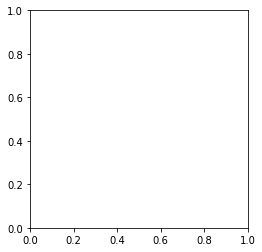

In [30]:
plt.imshow(digit, cmap=plt.cm.binary)


In [31]:
plt.show()

**새로운 데이터에서 모델 평가하기**

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9832
테스트 정확도: 0.9832000136375427


## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [55]:
import numpy as np
x = np.array(12)
x

array(12)

In [56]:
x.ndim

0

### 벡터 (랭크-1 텐서)

In [57]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [58]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [59]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [60]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 핵심 속성

In [84]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [85]:
train_images.ndim

3

In [86]:
train_images.shape

(60000, 28, 28)

In [87]:
train_images.dtype

dtype('uint8')

**다섯 번째 이미지 출력하기**

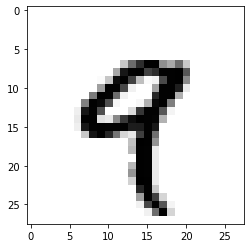

In [88]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [89]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [90]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [91]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [92]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [95]:
my_slice = train_images[:, 14:, 14:]

In [96]:
my_slice = train_images[:, 7:-7, 7:-7]

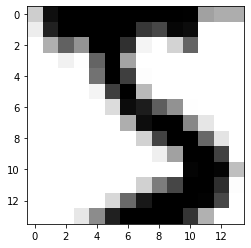

In [97]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

### 배치 데이터

In [98]:
batch = train_images[:128]

In [99]:
batch = train_images[128:256]

In [101]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### 텐서의 실제 사례

### 벡터 데이터 (생략)


### 시계열 데이터 또는 시퀀스 데이터 (읽어만 볼것)

### 이미지 데이터

### 비디오 데이터 (읽어만 볼 것)

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [103]:
def naive_relu(x):
    assert len(x.shape) == 2

    x = x.copy()   # 필요한 이유 : 지웠을 경우 데이터가 바뀌어진다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [110]:
def naive_relu(x):
    assert len(x.shape) == 2
 # 필요한 이유 : 지웠을 경우
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [111]:
x = np.array([[1,2,3],[2,-1,-2]])

In [112]:
x

array([[ 1,  2,  3],
       [ 2, -1, -2]])

In [113]:
b= naive_relu(x)

In [114]:
b

array([[1, 2, 3],
       [2, 0, 0]])

In [115]:
x

array([[1, 2, 3],
       [2, 0, 0]])

In [124]:
a=np.array([1,2,3])
b=a

In [125]:
b[0]=0

In [126]:
a

array([0, 2, 3])

In [127]:
b

array([0, 2, 3])

In [128]:
x=np.array([1,2,-1])
naive.relu(x)

NameError: ignored

In [108]:
x=np.array([1,2,-1])

In [109]:
len(x)

3

In [130]:
def naive_add(x, y):   #살펴만 볼 것
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):       # for문을 많이 쓸 경우 데이터 처리 속도가 많이 느려짐 (비효율적)
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [133]:
import time    #속도 비교

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):    #for문을 조금 쓰면서 matrix문을 쓰는 것이 매우 좋음
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [135]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)    # 
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.80 s


### 브로드캐스팅

In [136]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [137]:
y = np.expand_dims(y, axis=0)

In [138]:
Y = np.concatenate([y] * 32, axis=0)

In [141]:
Y.shape

(32, 10)

In [139]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [140]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### 텐서 곱셈 (생략)

In [142]:
import numpy as np

In [143]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [144]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [145]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [146]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [147]:
def naive_matrix_dot(x, y):    #생략
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환

In [150]:
train_images = train_images.reshape((60000, 28 * 28))

In [151]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [152]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [153]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [154]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법

### 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## 첫 번째 예제 다시 살펴보기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2582 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1046 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9890


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 5.65
100번째 배치 손실: 2.23
200번째 배치 손실: 2.22
300번째 배치 손실: 2.09
400번째 배치 손실: 2.23
에포크 1
0번째 배치 손실: 1.92
100번째 배치 손실: 1.87
200번째 배치 손실: 1.84
300번째 배치 손실: 1.72
400번째 배치 손실: 1.84
에포크 2
0번째 배치 손실: 1.60
100번째 배치 손실: 1.58
200번째 배치 손실: 1.52
300번째 배치 손실: 1.43
400번째 배치 손실: 1.52
에포크 3
0번째 배치 손실: 1.34
100번째 배치 손실: 1.34
200번째 배치 손실: 1.25
300번째 배치 손실: 1.22
400번째 배치 손실: 1.28
에포크 4
0번째 배치 손실: 1.15
100번째 배치 손실: 1.16
200번째 배치 손실: 1.05
300번째 배치 손실: 1.05
400번째 배치 손실: 1.12
에포크 5
0번째 배치 손실: 1.00
100번째 배치 손실: 1.02
200번째 배치 손실: 0.91
300번째 배치 손실: 0.93
400번째 배치 손실: 1.00
에포크 6
0번째 배치 손실: 0.89
100번째 배치 손실: 0.91
200번째 배치 손실: 0.80
300번째 배치 손실: 0.84
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.81
100번째 배치 손실: 0.83
200번째 배치 손실: 0.73
300번째 배치 손실: 0.77
400번째 배치 손실: 0.84
에포크 8
0번째 배치 손실: 0.74
100번째 배치 손실: 0.76
200번째 배치 손실: 0.66
300번째 배치 손실: 0.71
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.69
100번째 배치 손실: 0.71
200번째 배치 손실: 0.61
300번째 배치 손실: 0.67
400번째 배치 손실: 0.75


### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82


## 요약